# Optimal Transport with CVX
This notebook computes the 2-Wasserstein distance between two datasets using linear programming.

Let $x_1,\dots,x_n$ and $y_1,\dots,y_n$ be point clouds in $\mathbb R^d$. Collect the points $x_i$ as the rows of an $n\times d$ matrix $X$, and the points $y_i$ as the rows of an $n\times d$ matrix $Y$. One can show that the square of the 2-Wasserstein distance between these datasets can be written
$$(W_2(X,Y))^2 = \frac{1}{n}\left(\|X\|_F^2 + \|Y\|_F^2 - 2 \max_P \operatorname{tr}(PYX^T)\right)$$
where the maximum ranges over all doubly stochastic matrices $P$. This leads us to a linear programming problem! We can solve this by giving it to the general purpose solver CVX.

In [1]:
import cvxpy as cp
import numpy as np
from numpy.linalg import norm
from math import sqrt
import matplotlib.pyplot as plt

# Simple Dataset

In [2]:
#Construct datasets
d=2
n=3

X = np.array([[0,1],
               [1,0],
               [-1,0]])
Y = np.array([[0,0],
               [1,1],
               [-1,1]])

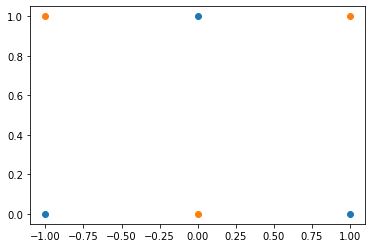

In [3]:
#Plot datasets
plt.scatter(X[:,0], X[:,1])
plt.scatter(Y[:,0], Y[:,1])

In [4]:
#Solve linear program
ones = np.matrix([1 for _ in range(n)])
P = cp.Variable((n,n))

objective = cp.Maximize(cp.trace(P@Y@np.transpose(X)))
# objective = cp.Maximize(cp.trace(np.transpose(X)@P@Y))
constraints = [ones @ P == 1, P @ np.transpose(ones) == 1, P >= 0]
problem = cp.Problem(objective, constraints)
problem.solve()

1.9999999965017383

In [5]:
#Compute Wasserstein distance
unnormalized_square_distance = norm(X)**2 + norm(Y)**2 - 2*round(problem.value,5)
distance = sqrt((1/n)*unnormalized_square_distance)
print("2-Wasserstein distance between point clouds: " + str(distance))

2-Wasserstein distance between point clouds: 1.0


# Random Dataset

We compute the 2-Wasserstein distance between point clouds of 300 points each, sampled from the uniform distribution on the unit square.

In [6]:
d=2
n=300

X = np.random.rand(n,d)
Y = np.random.rand(n,d)

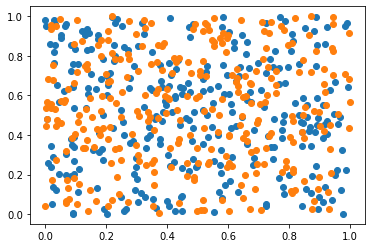

In [7]:
#Plot datasets
plt.scatter(X[:,0], X[:,1])
plt.scatter(Y[:,0], Y[:,1])

In [8]:
#Solve linear program
ones = np.matrix([1 for _ in range(n)])
P = cp.Variable((n,n))

objective = cp.Maximize(cp.trace(P@Y@np.transpose(X)))
# objective = cp.Maximize(cp.trace(np.transpose(X)@P@Y))
constraints = [ones @ P == 1, P @ np.transpose(ones) == 1, P >= 0]
problem = cp.Problem(objective, constraints)
problem.solve()

195.99113060878625

In [9]:
#Compute Wasserstein distance
unnormalized_square_distance = norm(X)**2 + norm(Y)**2 - 2*round(problem.value,5)
distance = sqrt((1/n)*unnormalized_square_distance)
print("2-Wasserstein distance between point clouds: " + str(distance))

2-Wasserstein distance between point clouds: 0.06844739441224927
